<a href="https://colab.research.google.com/github/riyaghosall/TAI-IP/blob/main/TECH_A_INTERN_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1- Exploring and visualising a dataset**
Made by- Riya Ghosal



**Step 0: Importing libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratingsdf=pd.read_csv("/content/ratings_small.csv")



In [ ]:
linkdf=pd.read_csv("/content/links_small.csv")


In [ ]:
metadatadf=pd.read_csv("/content/movies_metadata.csv")

<ipython-input-344-9d415058b1de>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadatadf=pd.read_csv("/content/movies_metadata.csv")


**Step 1: Cleaning the data**

Cleaning the LINKS DATA

In [ ]:
linkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
del linkdf['tmdbId']


In [ ]:
linkdf

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041
...,...,...
9120,162672,3859980
9121,163056,4262980
9122,163949,2531318
9123,164977,27660


In [ ]:
duplicate_1=linkdf[linkdf.duplicated(keep=False)]
duplicate_1

,movieId,imdbId


Cleaning the RATINGS DATA

In [ ]:
ratingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratingsdf.drop(columns=['userId','timestamp'],inplace=True)

In [ ]:
ratingsdf.drop_duplicates(keep='first',inplace=True)

In [ ]:
ratingsdf

,movieId,rating
0,31,2.5
1,1029,3.0
2,1061,3.0
3,1129,2.0
4,1172,4.0
...,...,...
99874,1245,1.0
99998,6212,2.5
99999,6268,2.5
100000,6269,4.0


In [ ]:
ratingsdf.reset_index(inplace=True)

In [ ]:
ratingsdf

,index,movieId,rating
0,0,31,2.5
1,1,1029,3.0
2,2,1061,3.0
3,3,1129,2.0
4,4,1172,4.0
...,...,...,...
28670,99874,1245,1.0
28671,99998,6212,2.5
28672,99999,6268,2.5
28673,100000,6269,4.0


In [ ]:
ratingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28675 entries, 0 to 28674
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    28675 non-null  int64  
 1   movieId  28675 non-null  int64  
 2   rating   28675 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 672.2 KB


In [ ]:
del ratingsdf['index']


Cleaning the MOVIES DATA

In [ ]:
metadatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
metadatadf.drop(columns =["tagline","release_date","genres","production_companies","production_countries","adult","belongs_to_collection","homepage","id","overview","poster_path","runtime","spoken_languages","status","video"], inplace=True)

In [ ]:
metadatadf["popularity"]=pd.to_numeric(metadatadf["popularity"],errors="coerce")

In [ ]:
metadatadf['budget'] = pd.to_numeric(metadatadf['budget'], errors='coerce')

In [ ]:
metadatadf.drop(index=metadatadf[metadatadf['budget']==0].index,inplace=True)

In [ ]:
metadatadf['imdb_id']=metadatadf['imdb_id'].str[2:]
metadatadf['imdb_id'] = pd.to_numeric(metadatadf['imdb_id'], errors='coerce')

In [ ]:
metadatadf.rename(columns={"imdb_id":"imdbId"},inplace=True)

In [ ]:
metadatadf

,budget,imdbId,original_language,original_title,popularity,revenue,title,vote_average,vote_count
0,30000000.0,114709.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0
1,65000000.0,113497.0,en,Jumanji,17.015539,262797249.0,Jumanji,6.9,2413.0
3,16000000.0,114885.0,en,Waiting to Exhale,3.859495,81452156.0,Waiting to Exhale,6.1,34.0
5,60000000.0,113277.0,en,Heat,17.924927,187436818.0,Heat,7.7,1886.0
6,58000000.0,114319.0,en,Sabrina,6.677277,0.0,Sabrina,6.2,141.0
...,...,...,...,...,...,...,...,...,...
45402,2000000.0,3761706.0,ru,Корпоратив,0.524370,0.0,Corporate Event,3.5,4.0
45408,2000000.0,417949.0,ru,Марс,0.380933,0.0,Mars,5.0,2.0
45409,800000.0,933361.0,en,Dikari,0.903061,1328612.0,Savages,5.8,6.0
45412,2000000.0,1718881.0,en,Про любоff,0.121844,1268793.0,Pro Lyuboff,4.0,3.0


In [ ]:
metadatadf.drop_duplicates(keep='first',inplace=True)

In [ ]:
metadatadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 45422
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             8889 non-null   float64
 1   imdbId             8887 non-null   float64
 2   original_language  8892 non-null   object 
 3   original_title     8892 non-null   object 
 4   popularity         8889 non-null   float64
 5   revenue            8889 non-null   float64
 6   title              8889 non-null   object 
 7   vote_average       8889 non-null   float64
 8   vote_count         8889 non-null   float64
dtypes: float64(6), object(3)
memory usage: 694.7+ KB


In [ ]:
metadatadf.drop(index=metadatadf[metadatadf.budget.isnull()==True].index,inplace=True)

In [ ]:
metadatadf.drop(index=metadatadf[metadatadf.imdbId.isnull()==True].index,inplace=True)

In [ ]:
metadatadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 45422
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             8887 non-null   float64
 1   imdbId             8887 non-null   float64
 2   original_language  8887 non-null   object 
 3   original_title     8887 non-null   object 
 4   popularity         8887 non-null   float64
 5   revenue            8887 non-null   float64
 6   title              8887 non-null   object 
 7   vote_average       8887 non-null   float64
 8   vote_count         8887 non-null   float64
dtypes: float64(6), object(3)
memory usage: 694.3+ KB


In [ ]:
metadatadf

,budget,imdbId,original_language,original_title,popularity,revenue,title,vote_average,vote_count
0,30000000.0,114709.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0
1,65000000.0,113497.0,en,Jumanji,17.015539,262797249.0,Jumanji,6.9,2413.0
3,16000000.0,114885.0,en,Waiting to Exhale,3.859495,81452156.0,Waiting to Exhale,6.1,34.0
5,60000000.0,113277.0,en,Heat,17.924927,187436818.0,Heat,7.7,1886.0
6,58000000.0,114319.0,en,Sabrina,6.677277,0.0,Sabrina,6.2,141.0
...,...,...,...,...,...,...,...,...,...
45402,2000000.0,3761706.0,ru,Корпоратив,0.524370,0.0,Corporate Event,3.5,4.0
45408,2000000.0,417949.0,ru,Марс,0.380933,0.0,Mars,5.0,2.0
45409,800000.0,933361.0,en,Dikari,0.903061,1328612.0,Savages,5.8,6.0
45412,2000000.0,1718881.0,en,Про любоff,0.121844,1268793.0,Pro Lyuboff,4.0,3.0


**Step2: Integrating all 3 dataframes**

In [ ]:
dftemp=pd.merge(linkdf,metadatadf)

In [ ]:
 Moviedf=pd.merge(dftemp,ratingsdf)

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            19147 non-null  int64  
 1   imdbId             19147 non-null  int64  
 2   budget             19147 non-null  float64
 3   original_language  19147 non-null  object 
 4   original_title     19147 non-null  object 
 5   popularity         19147 non-null  float64
 6   revenue            19147 non-null  float64
 7   title              19147 non-null  object 
 8   vote_average       19147 non-null  float64
 9   vote_count         19147 non-null  float64
 10  rating             19147 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
Moviedf

,movieId,imdbId,budget,original_language,original_title,popularity,revenue,title,vote_average,vote_count,rating
0,1,114709,30000000.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0,3.0
1,1,114709,30000000.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0,4.0
2,1,114709,30000000.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0,5.0
3,1,114709,30000000.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0,2.0
4,1,114709,30000000.0,en,Toy Story,21.946943,373554033.0,Toy Story,7.7,5415.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...
19142,160565,4094724,10000000.0,en,The Purge: Election Year,13.178900,118587880.0,The Purge: Election Year,6.1,1356.0,2.0
19143,160567,2823054,33000000.0,en,Mike and Dave Need Wedding Dates,12.237571,77068246.0,Mike and Dave Need Wedding Dates,5.9,901.0,4.0
19144,161944,255313,8000000.0,en,The Last Brickmaker in America,0.038998,0.0,The Last Brickmaker in America,7.0,1.0,5.0
19145,162542,5165344,1000000.0,hi,रुस्तम,7.333139,0.0,Rustom,7.3,25.0,5.0


In [ ]:
Moviedf.drop_duplicates(keep='first',subset=['budget','original_language','original_title','popularity'],inplace=True)

In [ ]:
Moviedf.reset_index(inplace=True)

In [ ]:
Moviedf.drop(columns=['movieId','imdbId','index','original_title','title'],inplace=True)

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:
Moviedf


,budget,original_language,popularity,revenue,vote_average,vote_count,rating
0,30000000.0,en,21.946943,373554033.0,7.7,5415.0,3.0
1,65000000.0,en,17.015539,262797249.0,6.9,2413.0,2.0
2,16000000.0,en,3.859495,81452156.0,6.1,34.0,3.0
3,60000000.0,en,17.924927,187436818.0,7.7,1886.0,4.0
4,58000000.0,en,6.677277,0.0,6.2,141.0,3.0
...,...,...,...,...,...,...,...
4610,10000000.0,en,13.178900,118587880.0,6.1,1356.0,2.0
4611,33000000.0,en,12.237571,77068246.0,5.9,901.0,4.0
4612,8000000.0,en,0.038998,0.0,7.0,1.0,5.0
4613,1000000.0,hi,7.333139,0.0,7.3,25.0,5.0


**Step3: Making visualizations for various columns**

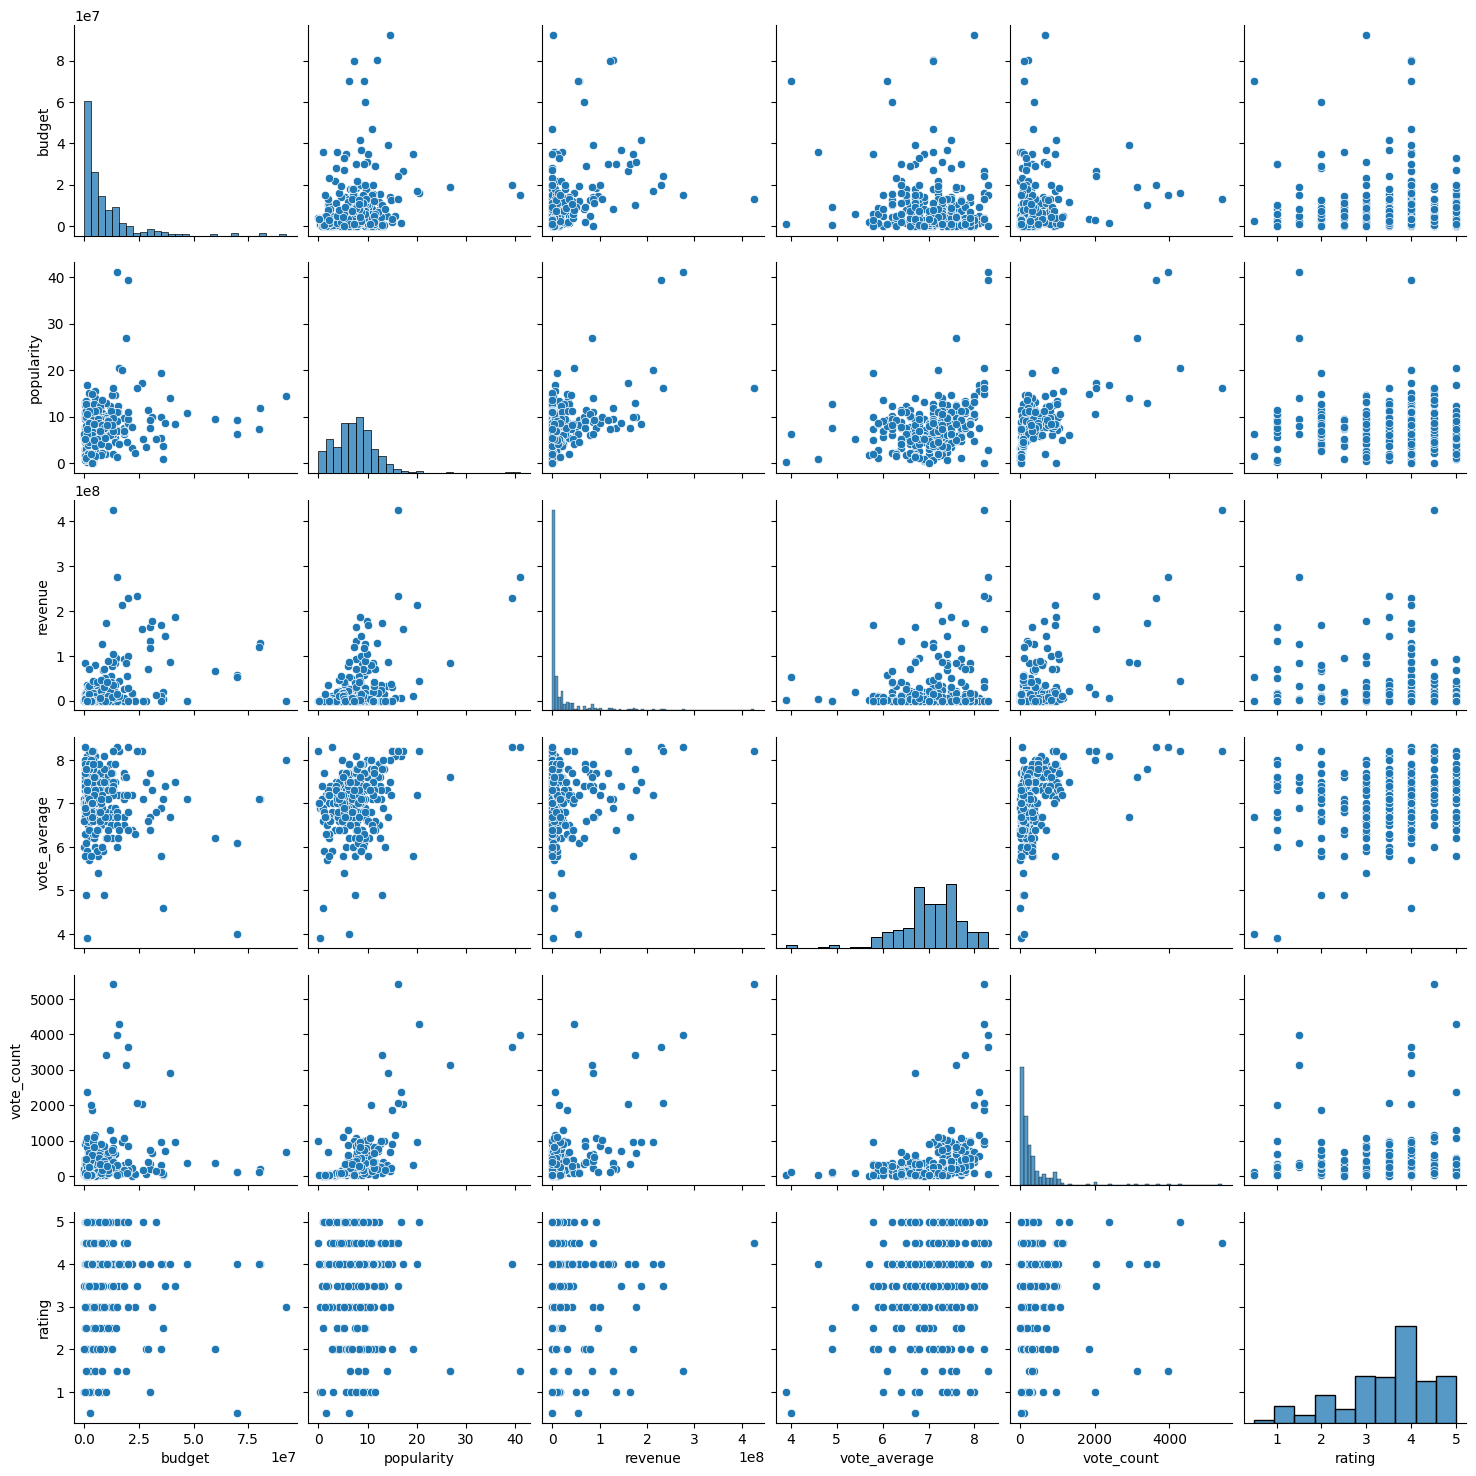

In [ ]:
sns.pairplot(Moviedf[Moviedf.original_language!='en'])

In [ ]:
Moviedf.revenue

0       373554033.0
1       262797249.0
2        81452156.0
3       187436818.0
4               0.0
           ...     
4610    118587880.0
4611     77068246.0
4612            0.0
4613            0.0
4614     16180000.0
Name: revenue, Length: 4615, dtype: float64

In [ ]:
Moviedf.revenue.describe()

count    4.615000e+03
mean     9.317426e+07
std      1.709251e+08
min      0.000000e+00
25%      3.221360e+06
50%      3.019910e+07
75%      1.057223e+08
max      2.787965e+09
Name: revenue, dtype: float64

<Axes: >

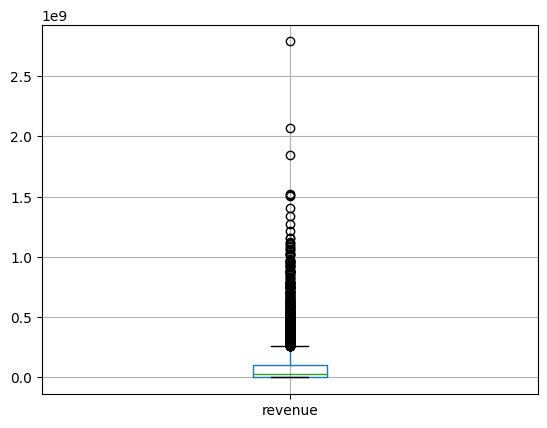

In [ ]:
Moviedf.boxplot(column='revenue')

<ipython-input-384-82e79e5fe821>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['revenue'])


<Axes: xlabel='revenue', ylabel='Density'>

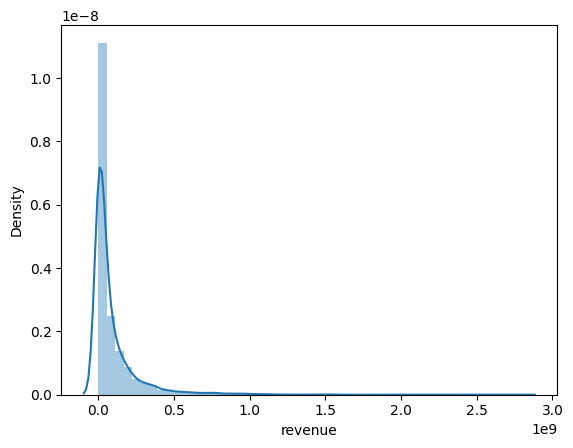

In [ ]:
sns.distplot(Moviedf['revenue'])

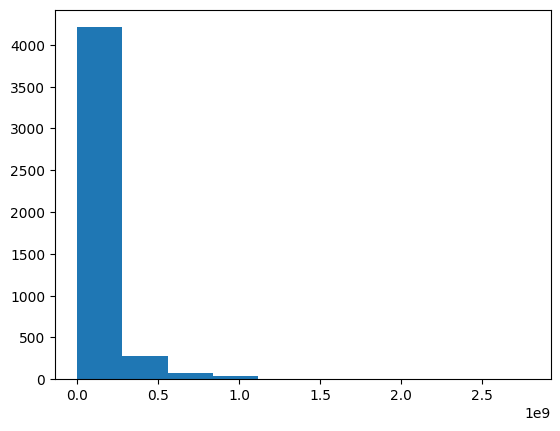

In [ ]:
plt.hist(Moviedf.revenue)
plt.show()


In [ ]:
Moviedf.revenue.skew()

4.387501184980393

In [ ]:

Moviedf.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4610    en
4611    en
4612    en
4613    hi
4614    hi
Name: original_language, Length: 4615, dtype: object

In [ ]:
Moviedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


<Axes: title={'center': 'revenue'}, xlabel='original_language'>

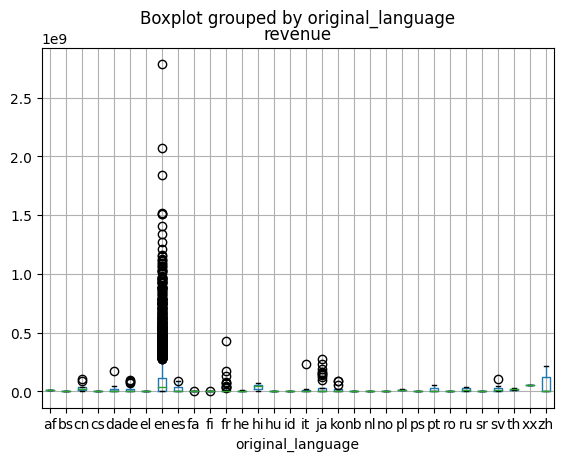

In [ ]:
Moviedf.boxplot(column='revenue',by='original_language')

<Axes: title={'center': 'revenue'}, xlabel='original_language'>

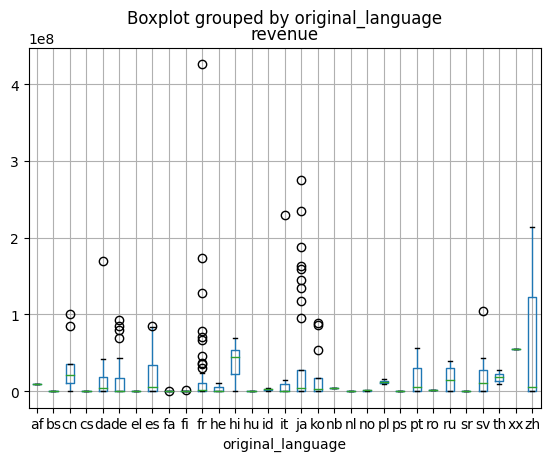

In [ ]:
Moviedf[Moviedf.original_language!='en'].boxplot(column='revenue',by='original_language')

<Axes: title={'center': 'budget'}, xlabel='original_language'>

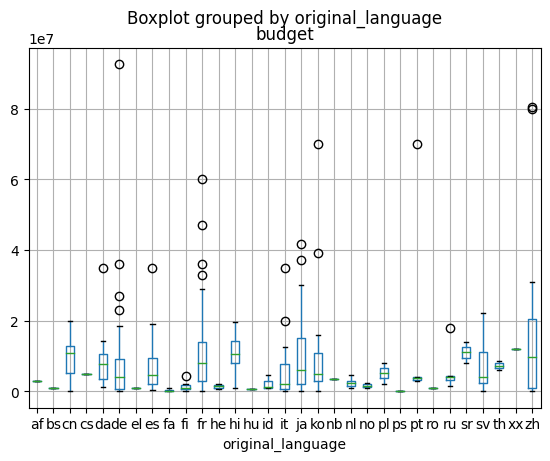

In [ ]:
Moviedf[Moviedf.original_language!='en'].boxplot(column='budget',by='original_language')

<Axes: title={'center': 'rating'}, xlabel='original_language'>

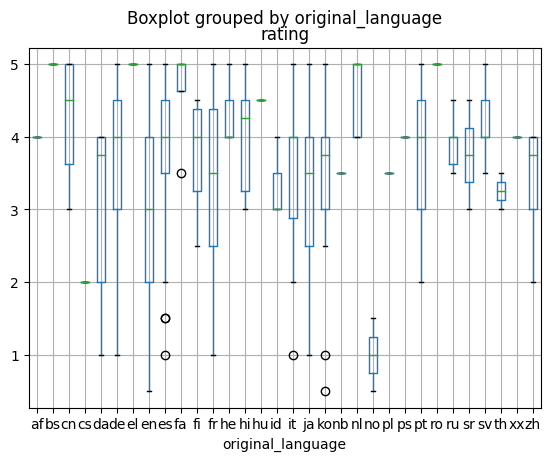

In [ ]:
Moviedf.boxplot(column='rating',by='original_language')


<Axes: title={'center': 'vote_count'}, xlabel='original_language'>

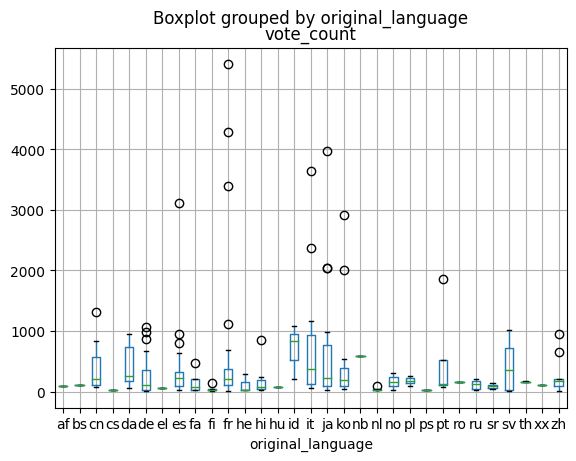

In [ ]:
Moviedf[Moviedf.original_language!='en'].boxplot(column='vote_count',by='original_language')

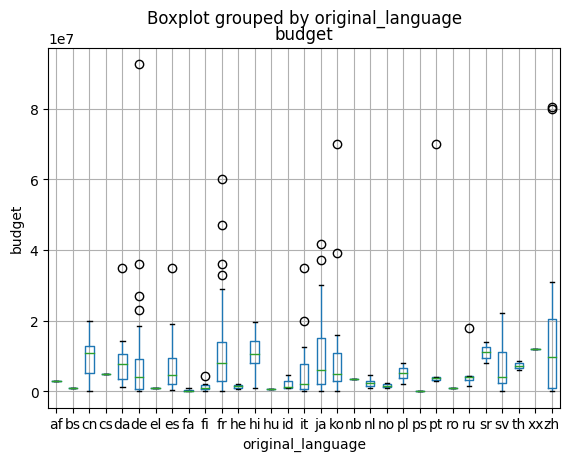

In [ ]:
Moviedf[Moviedf.original_language!="en"].boxplot(column='budget',by='original_language')
plt.xlabel('original_language')
plt.ylabel('budget')
plt.show()

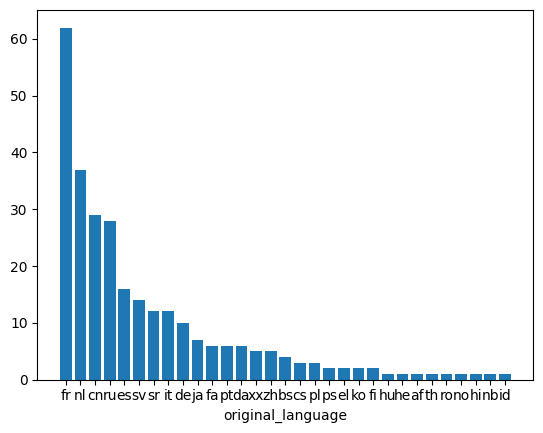

In [ ]:
x=Moviedf[Moviedf.original_language!='en'].original_language.unique()
y=Moviedf[Moviedf.original_language!='en'].original_language.value_counts()
plt.bar(x,y)
plt.xlabel('original_language')
plt.show()


<Axes: xlabel='original_language', ylabel='popularity'>

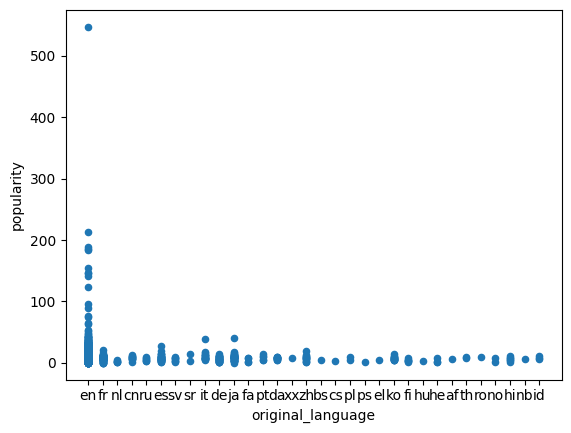

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="popularity")

<Axes: xlabel='original_language', ylabel='rating'>

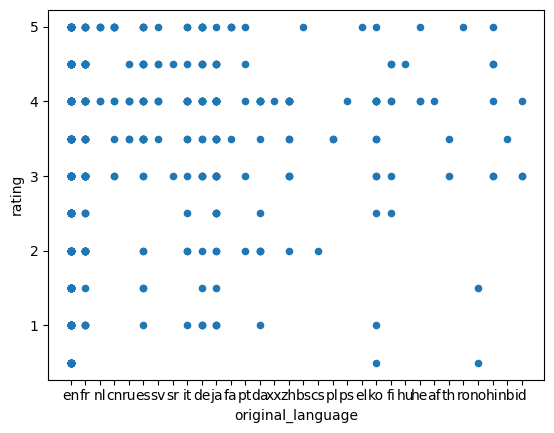

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="rating")


<Axes: xlabel='original_language', ylabel='revenue'>

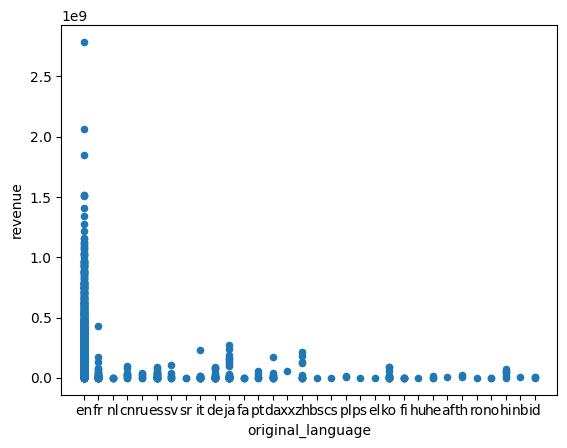

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="revenue")

<Axes: xlabel='original_language', ylabel='budget'>

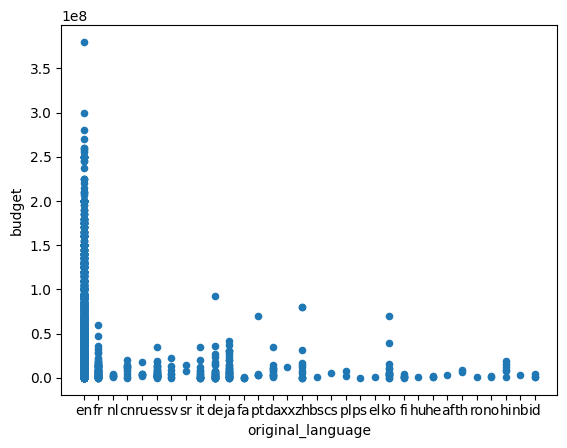

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="budget")

<Axes: xlabel='original_language', ylabel='vote_average'>

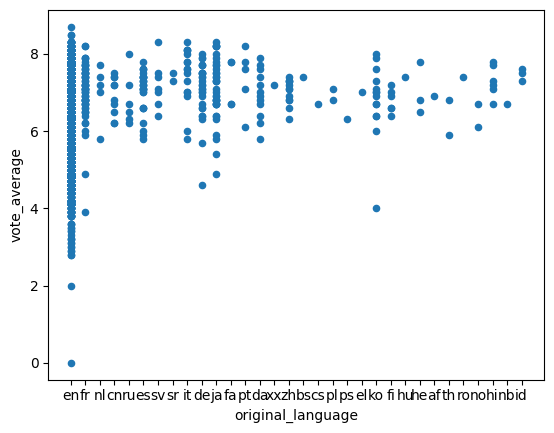

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="vote_average")

<Axes: xlabel='original_language', ylabel='vote_count'>

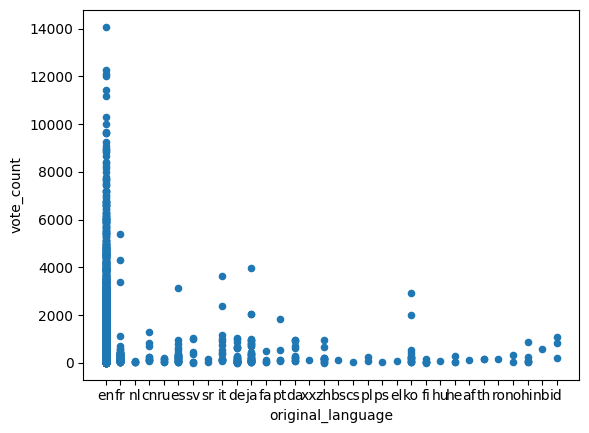

In [ ]:
Moviedf.plot(kind="scatter",x="original_language",y="vote_count")

<ipython-input-402-67c30982e144>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['budget'])


<Axes: xlabel='budget', ylabel='Density'>

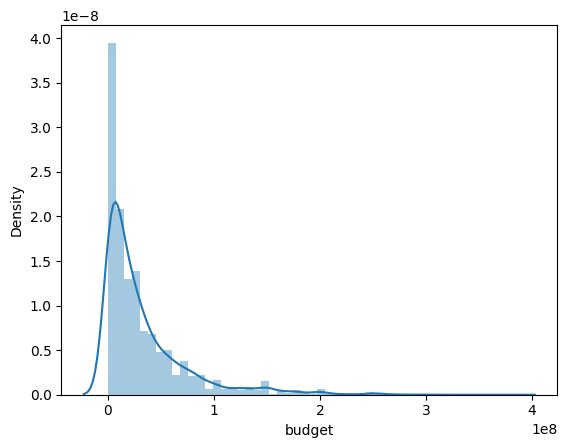

In [ ]:
sns.distplot(Moviedf['budget'])

In [ ]:
Moviedf.budget

0       30000000.0
1       65000000.0
2       16000000.0
3       60000000.0
4       58000000.0
           ...    
4610    10000000.0
4611    33000000.0
4612     8000000.0
4613     1000000.0
4614    15050000.0
Name: budget, Length: 4615, dtype: float64

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:
Moviedf.budget.describe()

count    4.615000e+03
mean     3.272486e+07
std      4.097553e+07
min      1.000000e+00
25%      5.645940e+06
50%      1.900000e+07
75%      4.200000e+07
max      3.800000e+08
Name: budget, dtype: float64

<Axes: >

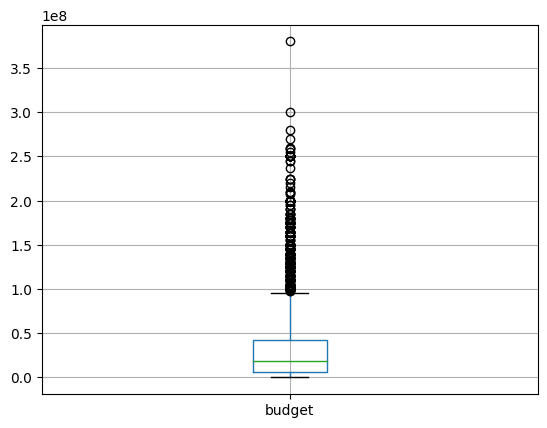

In [ ]:
Moviedf.boxplot(column='budget')

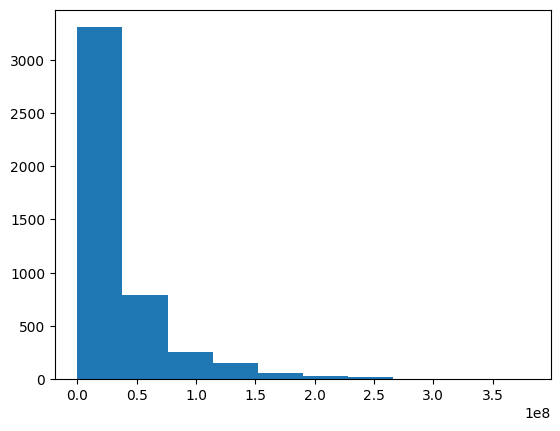

In [ ]:
x=Moviedf.budget
plt.hist(x)
plt.show()

In [ ]:
Moviedf.budget.skew()

2.403832124132628

In [ ]:
Moviedf.budget.kurtosis()

7.43438504067017

In [ ]:
Moviedf.popularity

0       21.946943
1       17.015539
2        3.859495
3       17.924927
4        6.677277
          ...    
4610    13.178900
4611    12.237571
4612     0.038998
4613     7.333139
4614     1.423358
Name: popularity, Length: 4615, dtype: float64

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:
Moviedf.popularity.describe()

count    4615.000000
mean        9.958004
std        12.082632
min         0.001202
25%         6.228179
50%         8.768806
75%        11.840348
max       547.488298
Name: popularity, dtype: float64

<Axes: >

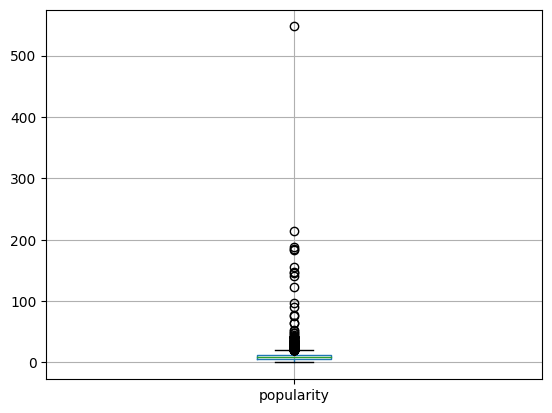

In [ ]:
Moviedf.boxplot(column='popularity')


<Axes: xlabel='revenue', ylabel='popularity'>

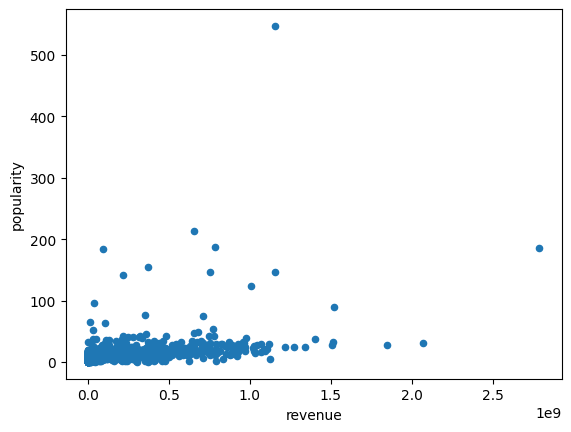

In [ ]:

Moviedf.plot(kind="scatter",x="revenue",y="popularity")


<Axes: xlabel='budget', ylabel='popularity'>

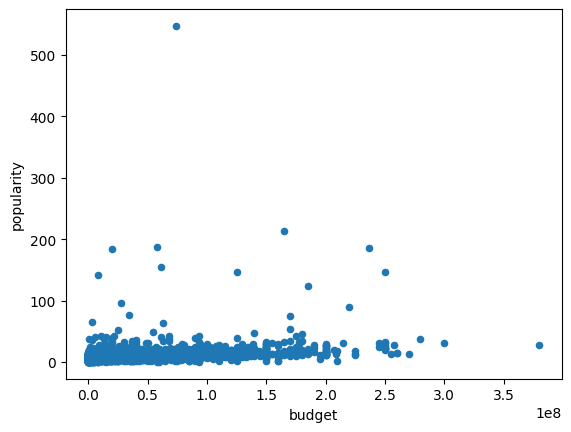

In [ ]:
Moviedf.plot(kind="scatter",x="budget",y="popularity")

<Axes: xlabel='rating', ylabel='popularity'>

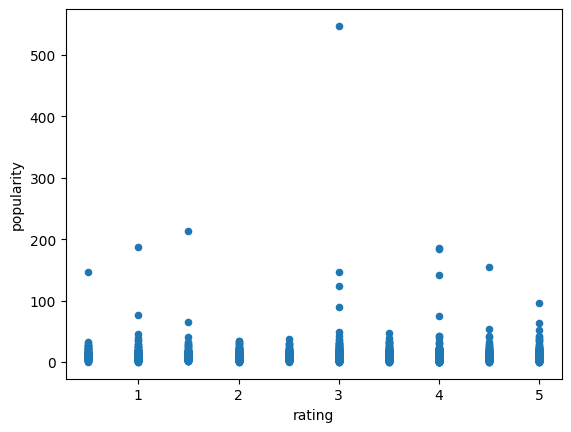

In [ ]:
Moviedf.plot(kind="scatter",x="rating",y="popularity")

<Axes: xlabel='vote_count', ylabel='popularity'>

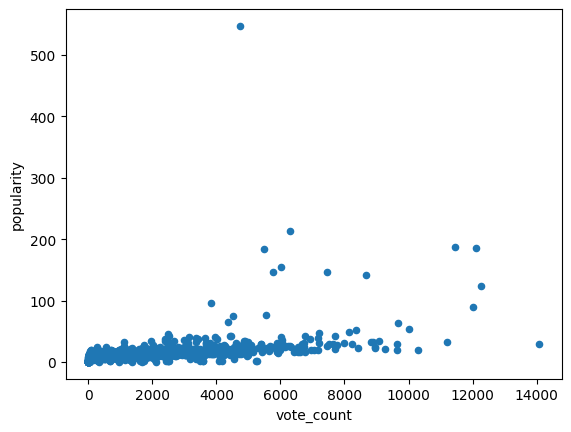

In [ ]:
Moviedf.plot(kind="scatter",x="vote_count",y="popularity")

<Axes: xlabel='vote_average', ylabel='popularity'>

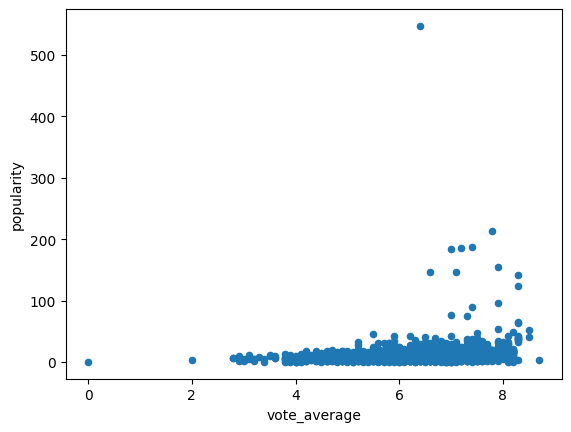

In [ ]:
Moviedf.plot(kind="scatter",x="vote_average",y="popularity")

<ipython-input-419-ffacd700ee65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['popularity'])


<Axes: xlabel='popularity', ylabel='Density'>

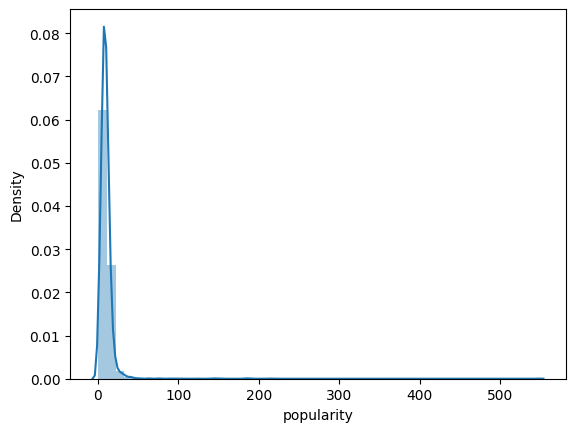

In [ ]:
sns.distplot(Moviedf['popularity'])

In [ ]:
Moviedf.popularity.skew()

23.97907556723426

In [ ]:
Moviedf.popularity.kurtosis()

911.9314610259788

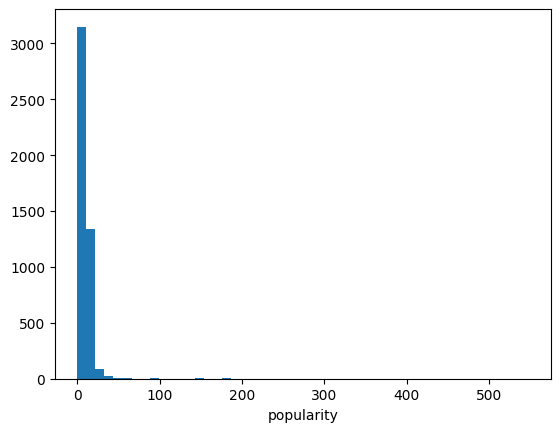

In [ ]:
plt.hist(Moviedf['popularity'],bins=50)
plt.xlabel('popularity')
plt.show()

In [ ]:
Moviedf.vote_average

0       7.7
1       6.9
2       6.1
3       7.7
4       6.2
       ... 
4610    6.1
4611    5.9
4612    7.0
4613    7.3
4614    6.7
Name: vote_average, Length: 4615, dtype: float64

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:
Moviedf.vote_average.describe()

count    4615.000000
mean        6.375298
std         0.869587
min         0.000000
25%         5.800000
50%         6.400000
75%         7.000000
max         8.700000
Name: vote_average, dtype: float64

<Axes: >

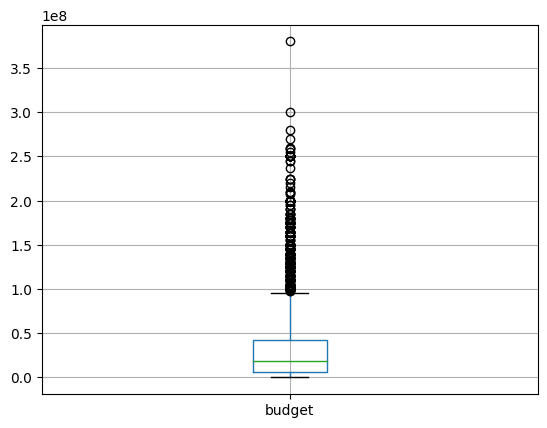

In [ ]:
Moviedf.boxplot(column='budget')

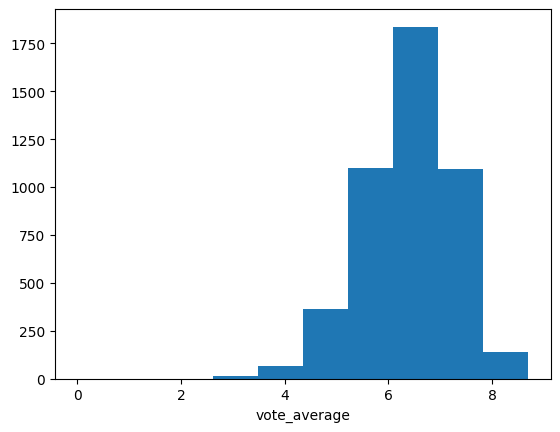

In [ ]:
plt.hist(Moviedf.vote_average)
plt.xlabel('vote_average')
plt.show()

<ipython-input-428-e249b0999f35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['vote_average'])


<Axes: xlabel='vote_average', ylabel='Density'>

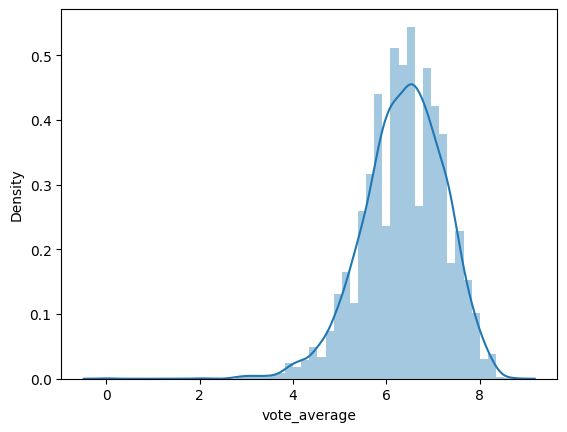

In [ ]:
sns.distplot(Moviedf['vote_average'])

In [ ]:
Moviedf.vote_average.skew()

-0.5393426175397888

In [ ]:
Moviedf.vote_average.kurtosis()

0.9968141386744152

In [ ]:
Moviedf.vote_count

0       5415.0
1       2413.0
2         34.0
3       1886.0
4        141.0
         ...  
4610    1356.0
4611     901.0
4612       1.0
4613      25.0
4614      26.0
Name: vote_count, Length: 4615, dtype: float64

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:

Moviedf.vote_count.describe()

count     4615.000000
mean       787.955363
std       1299.438326
min          0.000000
25%        105.000000
50%        307.000000
75%        870.000000
max      14075.000000
Name: vote_count, dtype: float64

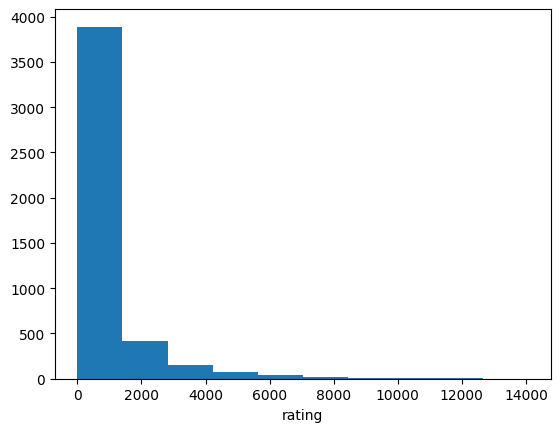

In [ ]:
plt.hist(Moviedf.vote_count)
plt.xlabel('rating')
plt.show()

<Axes: >

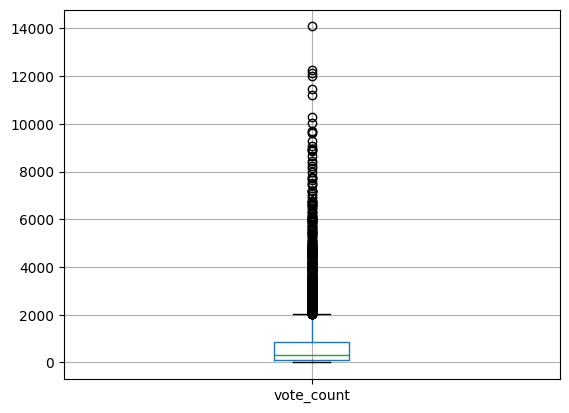

In [ ]:
Moviedf.boxplot(column='vote_count')

<ipython-input-436-9781a3b12d03>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['vote_count'])


<Axes: xlabel='vote_count', ylabel='Density'>

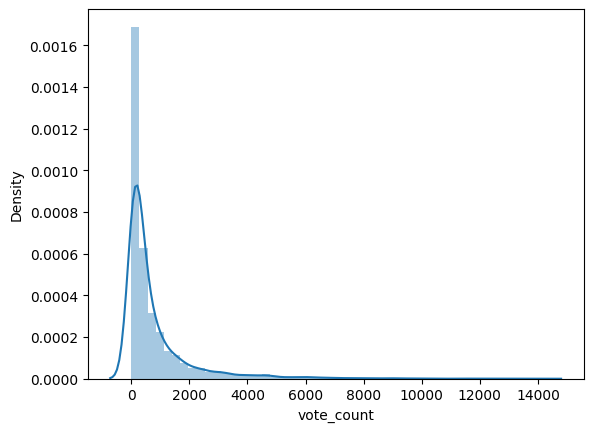

In [ ]:
sns.distplot(Moviedf['vote_count'])

In [ ]:
Moviedf.vote_count.skew()


3.6424101143411196

In [ ]:
Moviedf.vote_count.kurtosis()

18.02089983452465

In [ ]:
Moviedf.rating

0       3.0
1       2.0
2       3.0
3       4.0
4       3.0
       ... 
4610    2.0
4611    4.0
4612    5.0
4613    5.0
4614    3.0
Name: rating, Length: 4615, dtype: float64

In [ ]:
Moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4615 entries, 0 to 4614
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4615 non-null   float64
 1   original_language  4615 non-null   object 
 2   popularity         4615 non-null   float64
 3   revenue            4615 non-null   float64
 4   vote_average       4615 non-null   float64
 5   vote_count         4615 non-null   float64
 6   rating             4615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 252.5+ KB


In [ ]:
Moviedf.rating.describe()


count    4615.000000
mean        3.085049
std         1.187035
min         0.500000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

<Axes: >

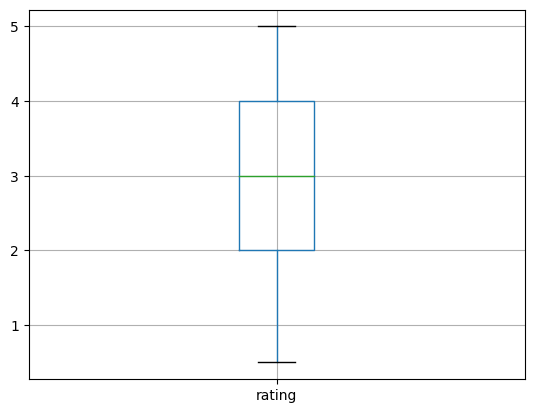

In [ ]:
Moviedf.boxplot(column='rating')


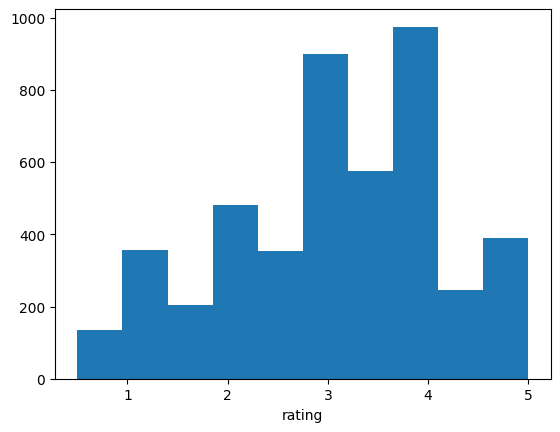

In [ ]:
plt.hist(Moviedf.rating)
plt.xlabel('rating')
plt.show()

<ipython-input-444-adc0fe7e4cab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Moviedf['rating'])


<Axes: xlabel='rating', ylabel='Density'>

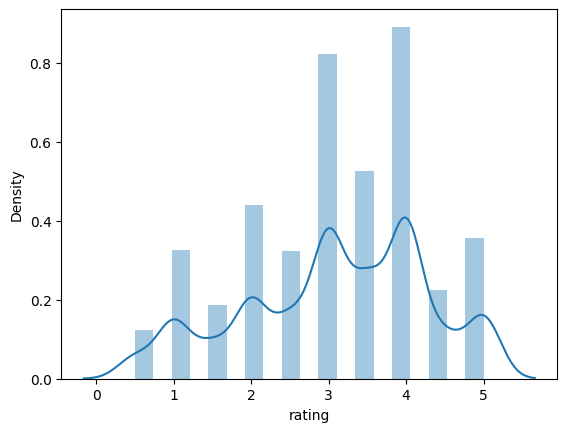

In [ ]:

sns.distplot(Moviedf['rating'])

In [ ]:
Moviedf.rating.skew()

-0.37078827353229044

In [ ]:
Moviedf.rating.kurtosis()

-0.6259096729057294

<ipython-input-447-ba880cb7aa80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(Moviedf.corr(), cmap="BuPu", annot=True)


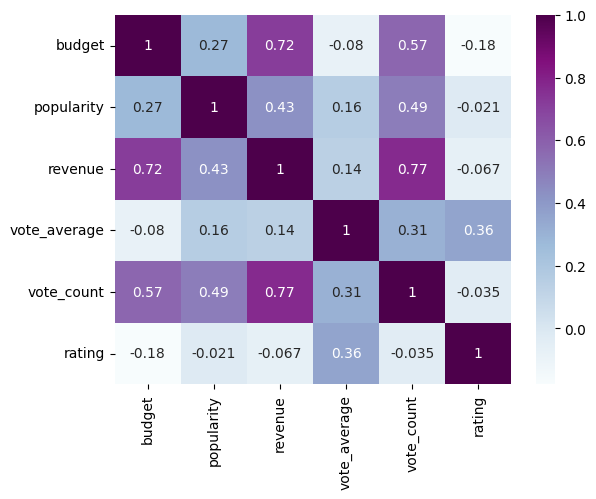

In [ ]:
dataplot = sns.heatmap(Moviedf.corr(), cmap="BuPu", annot=True)
plt.show()

In [ ]:
Moviedf.mad()

<ipython-input-448-b0ff78b001ff>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  Moviedf.mad()


budget          2.857383e+07
popularity      4.380404e+00
revenue         1.020084e+08
vote_average    6.877848e-01
vote_count      7.958448e+02
rating          9.637068e-01
dtype: float64